In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.01010999 0.07824641 0.0044822  ... 0.05459742 0.03049728 0.06670641]
 [0.01869932 0.14472359 0.00829022 ... 0.10098271 0.05640739 0.12337936]
 [0.08247679 0.63833014 0.03656555 ... 0.44540291 0.24879524 0.54418745]
 ...
 [0.05695154 0.44077714 0.02524909 ... 0.30755781 0.17179708 0.37577011]
 [0.0596252  0.46147002 0.02643445 ... 0.32199653 0.17986232 0.39341115]
 [0.03401018 0.26322219 0.01507819 ... 0.1836666  0.10259335 0.22440145]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.12148858 -0.01272105  0.02788423 ...  0.09770617 -0.29447921
  -0.09570291]
 [-0.09202394  0.27222809  0.27353635 ... -0.10967456  0.0189283
   0.10725326]
 [-0.01948222  0.54882589  0.06374317 ...  0.5047073   0.0877681
   0.65418244]
 ...
 [ 0.1038715   0.57610201  0.03927587 ...  0.31696738  0.16590568
   0.18744699]
 [ 0.10420549  0.55158596  0.07131655 ...  0.48093407  0.22986158
   0.34572627]
 [ 0.06728926  0.28474106  0.11185822 ...  0.20041143 -0.02492206
   0.2572

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[-0.12607688 -0.16955094 -0.03915094  0.06477947  0.00881612 -0.10786619
 -0.22464982  0.07813024 -0.2136769   0.03233927  0.1039226  -0.27909052
  0.10601093  0.02545162  0.19088583  0.44121451 -0.11558937 -0.01603887
  0.00941233  0.24341796 -0.33892968 -0.41852599 -0.00342223 -0.19532324
  0.19458593 -0.09709882 -0.09682594  0.05561474  0.15514617 -0.27287134
  0.03976669 -0.23451393  0.07529302 -0.09707931 -0.11993569 -0.01158221
  0.21713898 -0.24720568  0.44544061  0.08216754  0.02805545  0.16613703
  0.03488476 -0.26188661  0.11367473 -0.22304232  0.00677801 -0.15787475
  0.02804043 -0.14645779]
[ 0.37093827  0.02285875 -0.16315894 -0.01633028 -0.09270433  0.1246732
  0.16889865  0.10894582 -0.32506292  0.15948962  0.08588752  0.03313618
 -0.03621701 -0.11110787 -0.05114016 -0.16048514 -0.06095245 -0.11602261
  0.23842963  0.01738855 -0.1387525   0.12440961  0.03518424  0.29344699
  0.03542815 -0.02974227  0.05717078 -0.31752321 -0.

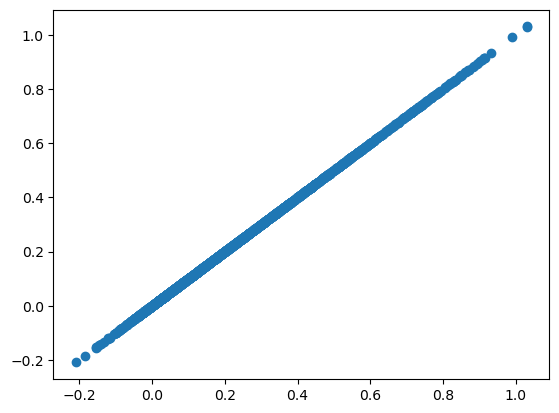

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

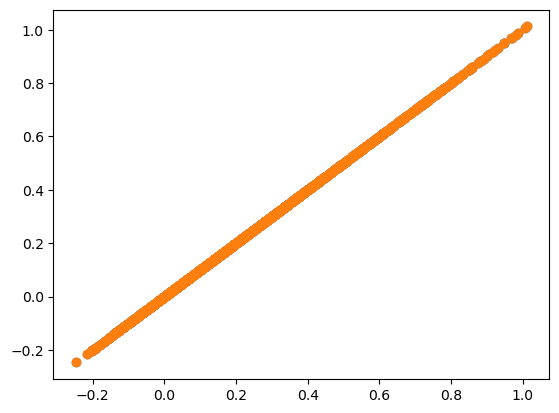

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[137.63039223, 137.63039223, 137.63039223, ..., 137.63039223,
        137.63039223, 137.63039223],
       [137.63039223, 137.63039223, 137.63039223, ..., 137.63039223,
        137.63039223, 137.63039223],
       [137.63039223, 137.63039223, 137.63039223, ..., 137.63039223,
        137.63039223, 137.63039223],
       ...,
       [137.63039223, 137.63039223, 137.63039223, ..., 137.63039223,
        137.63039223, 137.63039223],
       [137.63039223, 137.63039223, 137.63039223, ..., 137.63039223,
        137.63039223, 137.63039223],
       [137.63039223, 137.63039223, 137.63039223, ..., 137.63039223,
        137.63039223, 137.63039223]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([ 0.03108407,  0.2013756 ,  0.0174859 ,  0.2396996 ,  0.07673634,
         0.07388389,  0.21272097,  0.10487554,  0.10005599, -0.0134525 ,
         0.24451994,  0.1430686 ,  0.18862632,  0.08700907,  0.20862054,
         0.27000964,  0.24771798,  0.07196949,  0.20967485,  0.23510995,
         0.12496669,  0.11394724,  0.21872537,  0.2125163 ,  0.15643075,
         0.2532342 ,  0.13076796,  0.15423718,  0.0828893 ,  0.24177461,
         0.0380581 ,  0.01278554,  0.06057581,  0.17591038,  0.03670473,
         0.01027295,  0.09276455,  0.14004529,  0.07592588,  0.17165238]),
 array([0.00617432, 0.00617432, 0.00617432, 0.00617432, 0.00617432,
        0.00617432, 0.00617432, 0.00617432, 0.00617432, 0.00617432,
        0.00617432, 0.00617432, 0.00617432, 0.00617432, 0.00617432,
        0.00617432, 0.00617432, 0.00617432, 0.00617432, 0.00617432,
        0.00617432, 0.00617432, 0.00617432, 0.00617432, 0.00617432,
        0.00617432, 0.00617432, 0.00617432, 0.00617432, 0.00617432,
      

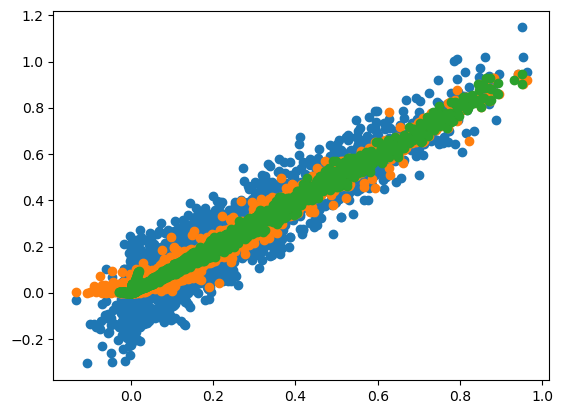

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


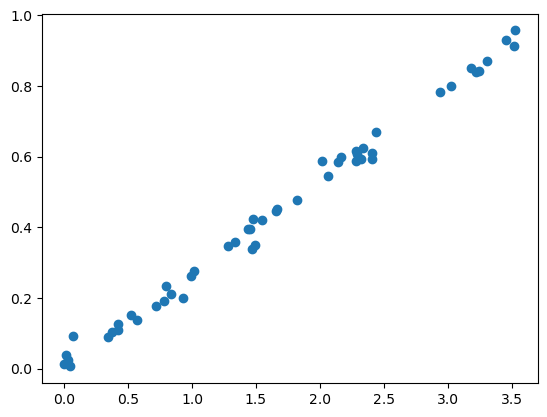

In [12]:
plt.scatter(mycebmf.L[:,0], u)

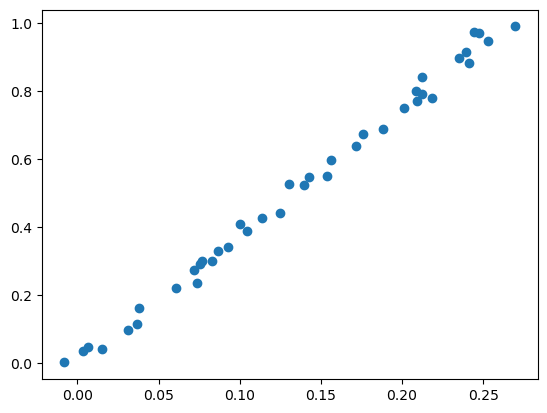

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([-0.04672215, -0.09099321, -0.00866326,  0.01467873,  0.00151059,
       -0.0353843 , -0.16648995,  0.01979369, -0.15122588,  0.00602145,
        0.03100976, -0.2351887 ,  0.03210427,  0.00496806,  0.11552294,
        0.38142294, -0.04000896, -0.00314119,  0.00175053,  0.19063662,
       -0.2928189 , -0.36517344, -0.00072047, -0.12597386,  0.12209518,
       -0.02835883, -0.02808236,  0.01173141,  0.07178672, -0.22862939,
        0.00786932, -0.18048184,  0.01812766, -0.0290388 , -0.04200234,
       -0.00274666,  0.15459607, -0.19785771,  0.38547907,  0.02050127,
        0.00548062,  0.08492115,  0.00662588, -0.21515012,  0.03665927,
       -0.16517045,  0.00111214, -0.07813909,  0.00528355, -0.0655245 ])

In [15]:
for i in range(40):
    mycebmf.iter()

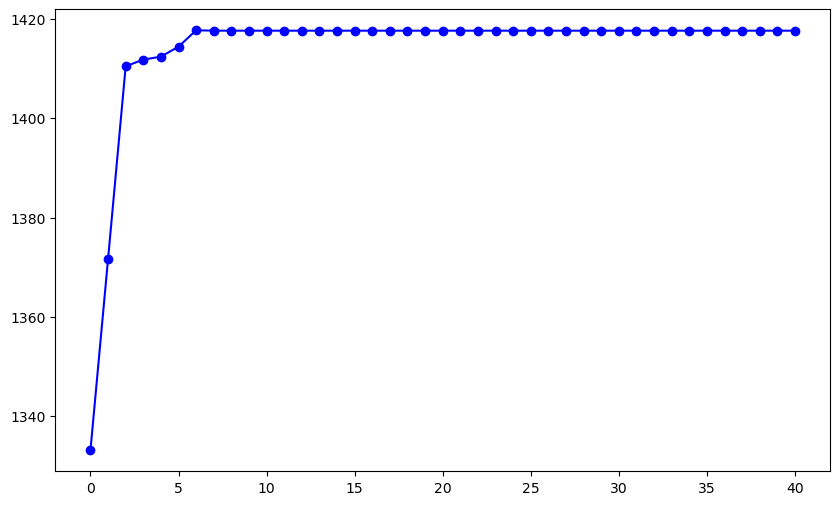

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [17]:

k=1
mask = ~np.isnan(Z)  # Assuming the mask is related to Z having no NaNs

tau= mycebmf.tau
nu=L[:,k] 
omega=mycebmf.L2[:,k]
Z= mycebmf.Y_fit
numerator_f_hat = np.sum(tau * Z * mask * nu[:, np.newaxis], axis=0)  # Sum over i (axis=0)
denominator_f_hat = np.sum(tau * mask * omega[:, np.newaxis], axis=0)
# Set tau to 0 wherever Z has nan values
 
    # Compute f_hat


NameError: name 'Z' is not defined

In [ ]:
denominator_f_hat.any()==0

In [ ]:
s_f = (denominator_f_hat) ** (-0.5)+ 1e-32     
    # Compute s_f
if  denominator_f_hat.any()==0:
    idx=  np.where((denominator_f_hat == 0))[0]
    s_f[idx]= 10*np.abs(denominator_f_hat[idx]) +1e-16
 

In [ ]:
np.abs(-9)